<a href="https://colab.research.google.com/github/kristianJW54/ML-Models-and-Projects/blob/main/Kmeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K-Means Clustering


---

**K-Means is an unsupervised machine learning algorithm**

It groups unlabelled data using centroids (k points which sit in the center of a group)

In this notebook we will look at the basic theory of K-means as well as a simple implementation:

- Initialising K number of centroids for a data set
-



#### Starting with the data

We will start by creating synthetic data consisting of 3 groups, the data is unlabelled meaning we can only distingish that there are 3 distinct groups by plotting the data on scatter plot to visualise the spread

Our model will use the k-means algorithm to identify these groups and be able to further assign future points to one of the groups

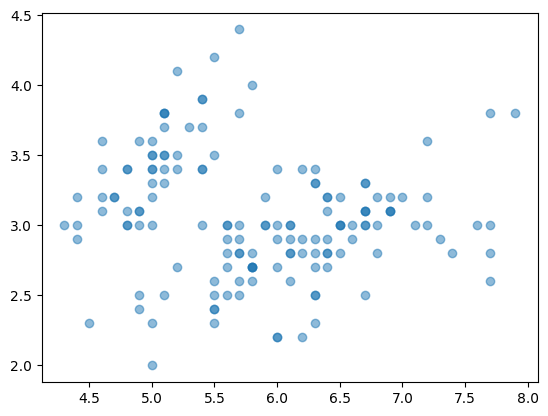

In [ ]:
from urllib.request import DataHandler
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()

data = iris.data

x = data[:,0]
y = data[:,1]

samples = np.array(list(zip(x, y)))


plt.scatter(x, y, alpha=0.5);

#### Initialising K centroids

To begin creating our model we need to first initialise k random points for the groups in the data set

We do this by using numpy's random.uniform method to take a random point between the min of x and y data and max of x and y data. After we have the random coordinates for the centroids we then want to merge them into an array by using np.array() with zip()

[[7.43114744 3.91097743]
 [6.9297869  3.80965528]
 [6.63176742 2.08625282]]


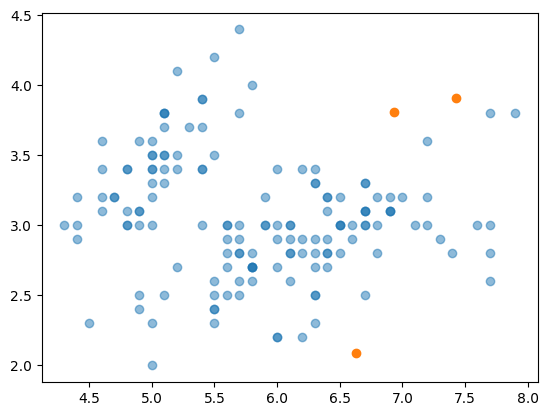

In [ ]:
import numpy as np


k = 3

centroid_x = np.random.uniform(np.min(x), np.max(x), k)
centroid_y = np.random.uniform(np.min(y), np.max(y), k)

centroids = np.array(list(zip(centroid_x, centroid_y)))

print(centroids)

plt.scatter(x,y,alpha=0.5, label="Data Points")
plt.scatter(centroid_x, centroid_y, label="Centroids")

plt.show()



####Assign Data Samples To Nearest Centroid

We will iterate through the data samples and calculate the distance to the centroids. We will then assign the data point to the centroid with the smallest distance

To do this we will first create a distance function which we can use on each data point as we iterate through.

- We need to combine the x and y points into an array
- We initialise a zero array for labels and distances
- We then create a distance function to find the difference between the data point and the centroid
- Update the labels list with the argmin of the distances

In [ ]:


# Define a distance function
def distance(data_point, centroid_point):
  """
  In this function, data points are combined points of (x,y) and centroids are combined points of (centroid x, centroid y) with the length of k
  For this we want to find the squared difference of each value in the tuples and then the combined difference by summing and square rooting

  """
  one = (data_point[0] - centroid_point[0]) ** 2
  two = (data_point[0] - centroid_point[0]) ** 2

  distance = (one + two) ** 0.5

  return distance


# Initialise the seros list which will be updated with the distance values as we iterate

labels = np.zeros(len(samples))
distances = np.zeros(len(centroids))


for i in range(len(samples)):

  distances[0] = distance(samples[i], centroids[0])
  distances[1] = distance(samples[i], centroids[1])
  distances[2] = distance(samples[i], centroids[2])

  cluster = np.argmin(distances)
  labels[i] = cluster


print(distances)
print(labels)

[2.16536947 1.4563386  1.0348754 ]
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 1. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 1. 2. 2. 0. 2. 0. 2. 0. 2. 2. 1. 2. 2. 2. 2. 0. 0. 2.
 1. 2. 0. 2. 2. 0. 2. 2. 2. 0. 0. 0. 2. 2. 2. 0. 2. 2. 2. 1. 2. 1. 2. 1.
 2. 2. 2. 2. 2. 2.]


####Place K Centroids at Updated Points - Repeat Until Convergence

Because we have labels of all the cluster points, we can iterate through and find the mean of the points in that cluster to get the new centroid

[[7.43114744 3.91097743]
 [6.9297869  3.80965528]
 [6.63176742 2.08625282]]
[[7.50909091 3.13636364]
 [6.9        3.07777778]
 [5.62923077 3.04923077]]


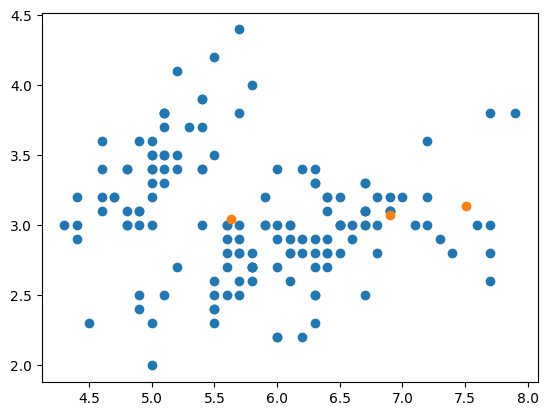

In [ ]:
from copy import deepcopy



centroids_old = deepcopy(centroids)

for i in range(k):

  points = [samples[j] for j in range(len(samples)) if labels[j] == i]
  centroids[i] = np.mean(points, axis=0)



print(centroids_old)
print(centroids)

plt.scatter(x,y)
plt.scatter(centroids[:, 0], centroids[:, 1])
plt.show()


#### Iterate Until Convergence

This is the part of the algorithm where we repeatedly execute Step 2 and 3 until the centroids stabilize (convergence).

We can do this using a while loop. And everything from Step 2 and 3 goes inside the loop.

For the condition of the while loop, we need to create an array named errors. In each error index, we calculate the difference between the updated centroid (centroids) and the old centroid (centroids_old).

The loop ends when all three values in errors are 0.

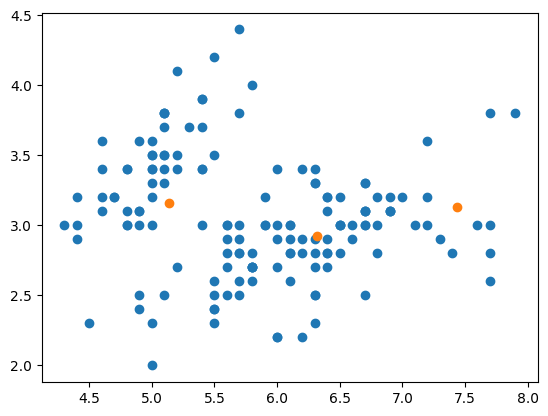

In [ ]:
# Initialise an error list

error = np.zeros(3)

error[0] = distance(centroids[0], centroids_old[0])
error[1] = distance(centroids[1], centroids_old[1])
error[2] = distance(centroids[2], centroids_old[2])

while error.all() != 0:

  for i in range(len(samples)):

    distances[0] = distance(samples[i], centroids[0])
    distances[1] = distance(samples[i], centroids[1])
    distances[2] = distance(samples[i], centroids[2])

    cluster = np.argmin(distances)
    labels[i] = cluster


  centroids_old = deepcopy(centroids)

  for i in range(k):

    points = [samples[j] for j in range(len(samples)) if labels[j] == i]
    centroids[i] = np.mean(points, axis=0)

    error[0] = distance(centroids[0], centroids_old[0])
    error[1] = distance(centroids[1], centroids_old[1])
    error[2] = distance(centroids[2], centroids_old[2])


plt.scatter(x,y)
plt.scatter(centroids[:, 0], centroids[:, 1])
plt.show()




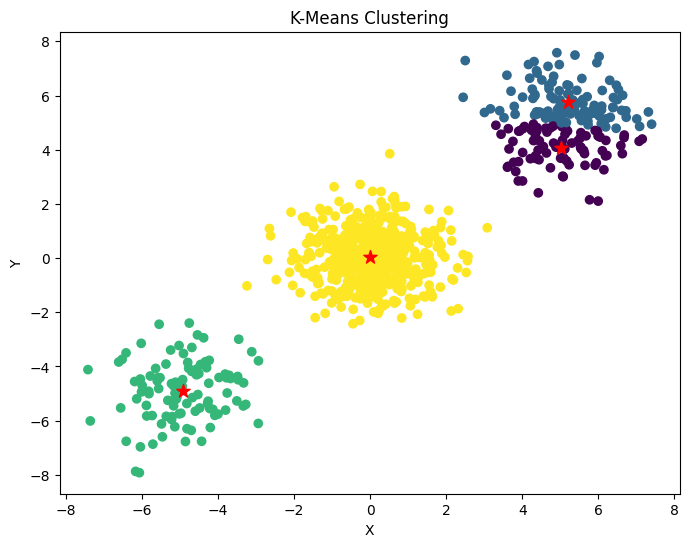

In [ ]:
import numpy as np
from copy import deepcopy

def k_means(samples, k, max_iterations=100, tolerance=1e-6):
    """
    Performs k-means clustering on the given samples.

    Args:
        samples (np.ndarray): The input data points.
        k (int): The number of clusters.
        max_iterations (int, optional): The maximum number of iterations. Default is 100.
        tolerance (float, optional): The tolerance for convergence. Default is 1e-6.

    Returns:
        np.ndarray: The cluster labels for each sample.
        np.ndarray: The final centroids of the clusters.
    """
    n_samples = len(samples)
    centroids = samples[np.random.choice(n_samples, k, replace=False)]
    labels = np.zeros(n_samples, dtype=int)
    distances = np.zeros(k)

    for _ in range(max_iterations):
        centroids_old = deepcopy(centroids)

        # Assign samples to closest centroids
        for i in range(n_samples):
            distances = np.linalg.norm(samples[i] - centroids, axis=1)
            labels[i] = np.argmin(distances)

        # Update centroids
        for i in range(k):
            points = samples[labels == i]
            if len(points) > 0:
                centroids[i] = np.mean(points, axis=0)

        # Check for convergence
        error = np.linalg.norm(centroids - centroids_old)
        if error < tolerance:
            break

    return labels, centroids

## Example usage
# Generate some sample data
np.random.seed(42)
x = np.random.randn(500, 2)
y1 = np.random.randn(200, 2) + np.array([5, 5])
y2 = np.random.randn(100, 2) + np.array([-5, -5])
samples = np.concatenate((x, y1, y2), axis=0)

# Run k-means clustering
labels, centroids = k_means(samples, k=4)

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(samples[:, 0], samples[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100, marker='*')
plt.title('K-Means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()